In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Loading heart disease Dataset
df=pd.read_csv('heart_deasease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#Feature Engineering
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

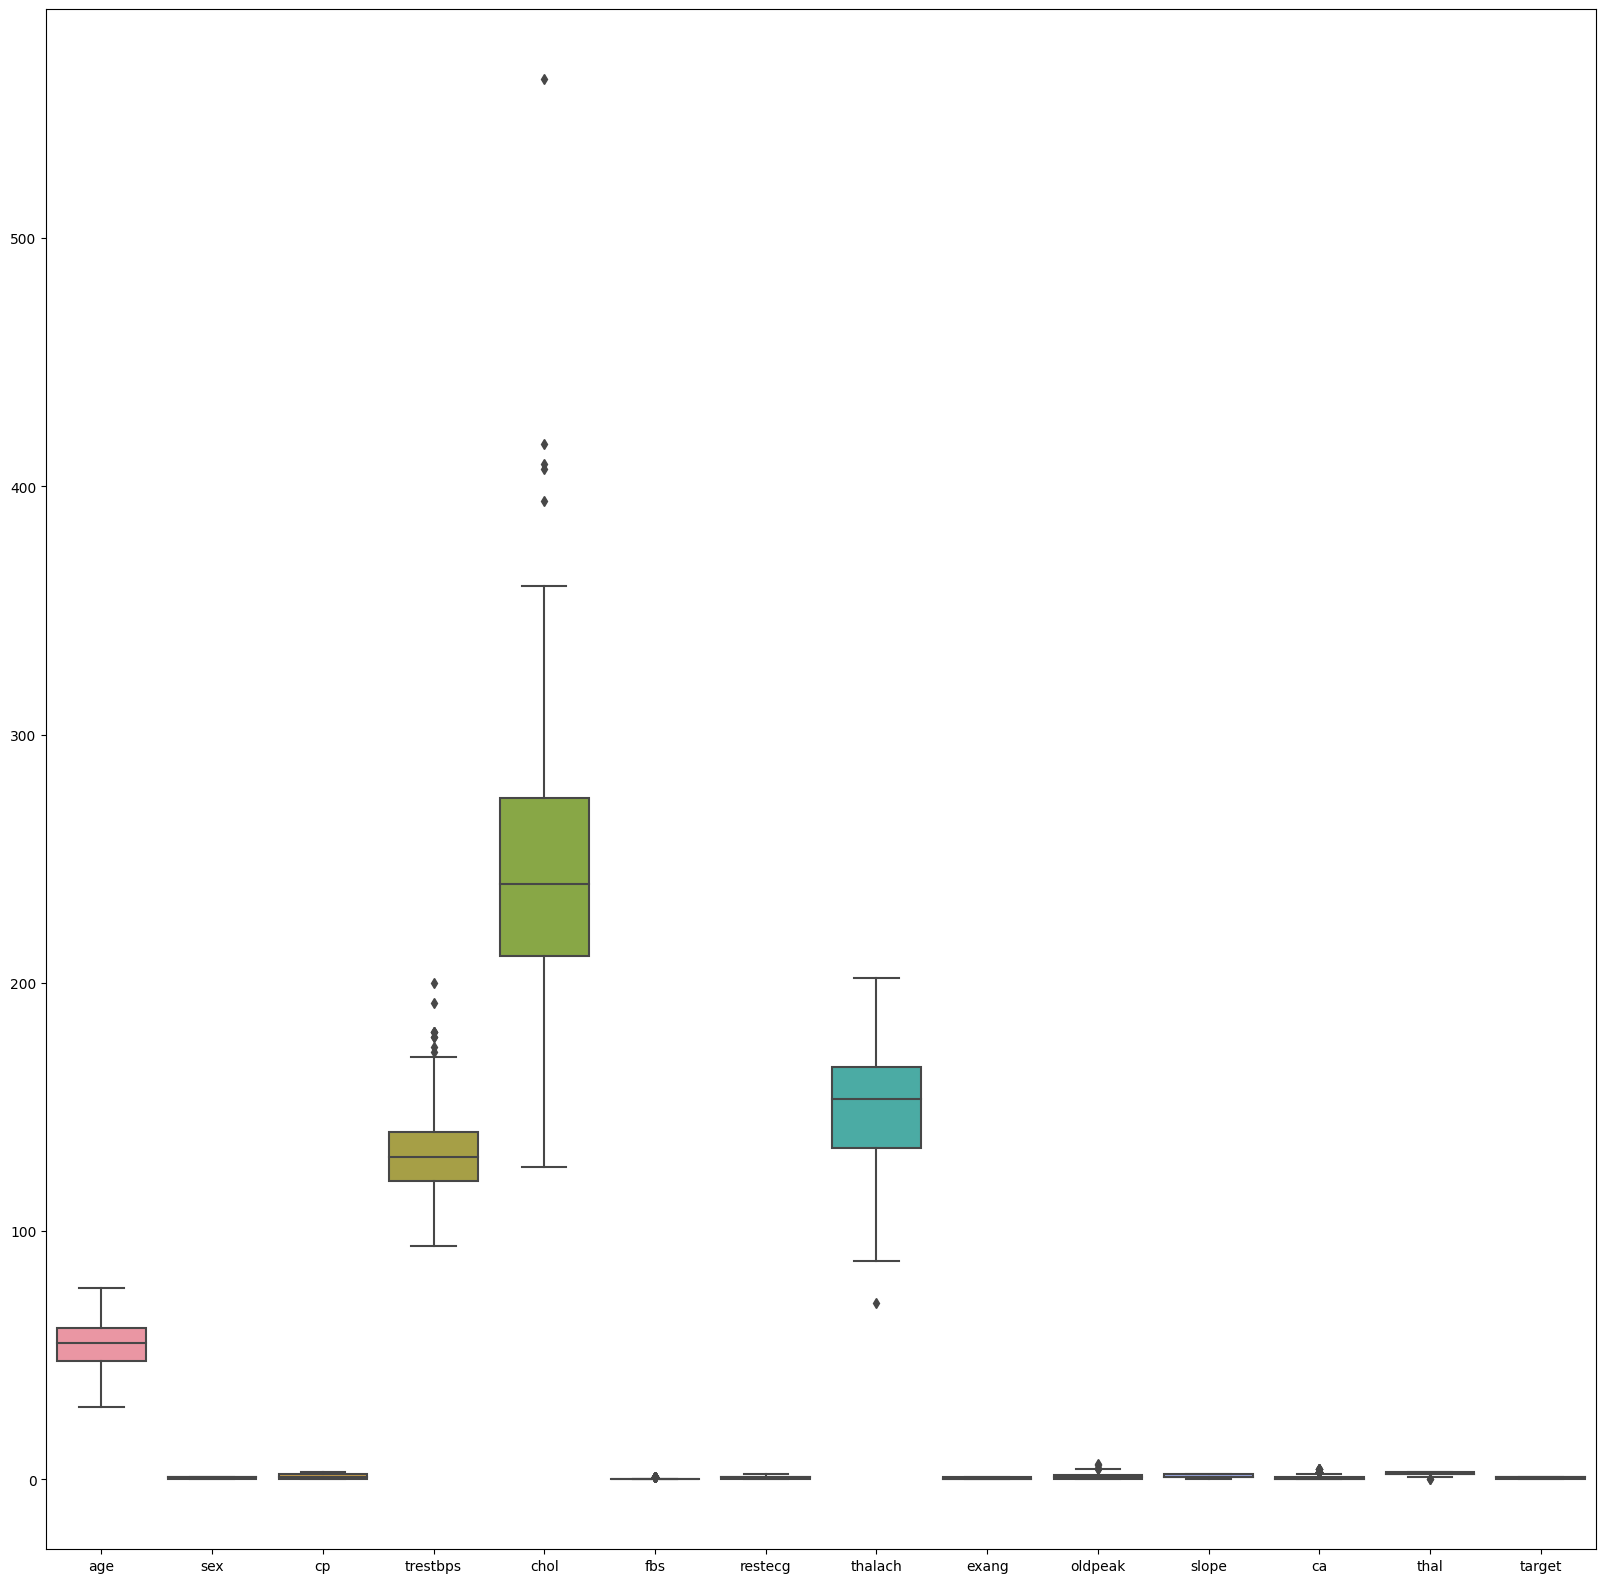

In [5]:
#Checking for outliers
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

In [6]:
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [7]:
threshold=3
print(np.where(z > 3)) #first array contain list of row and 2nd contain columns

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))


In [8]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [9]:
df=df[(z < 3).all(axis=1)]
df.shape

(287, 14)

In [10]:
df=df[~((df < ( Q1 - 1.5 * IQR)) | (df > ( Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(228, 14)

<Axes: >

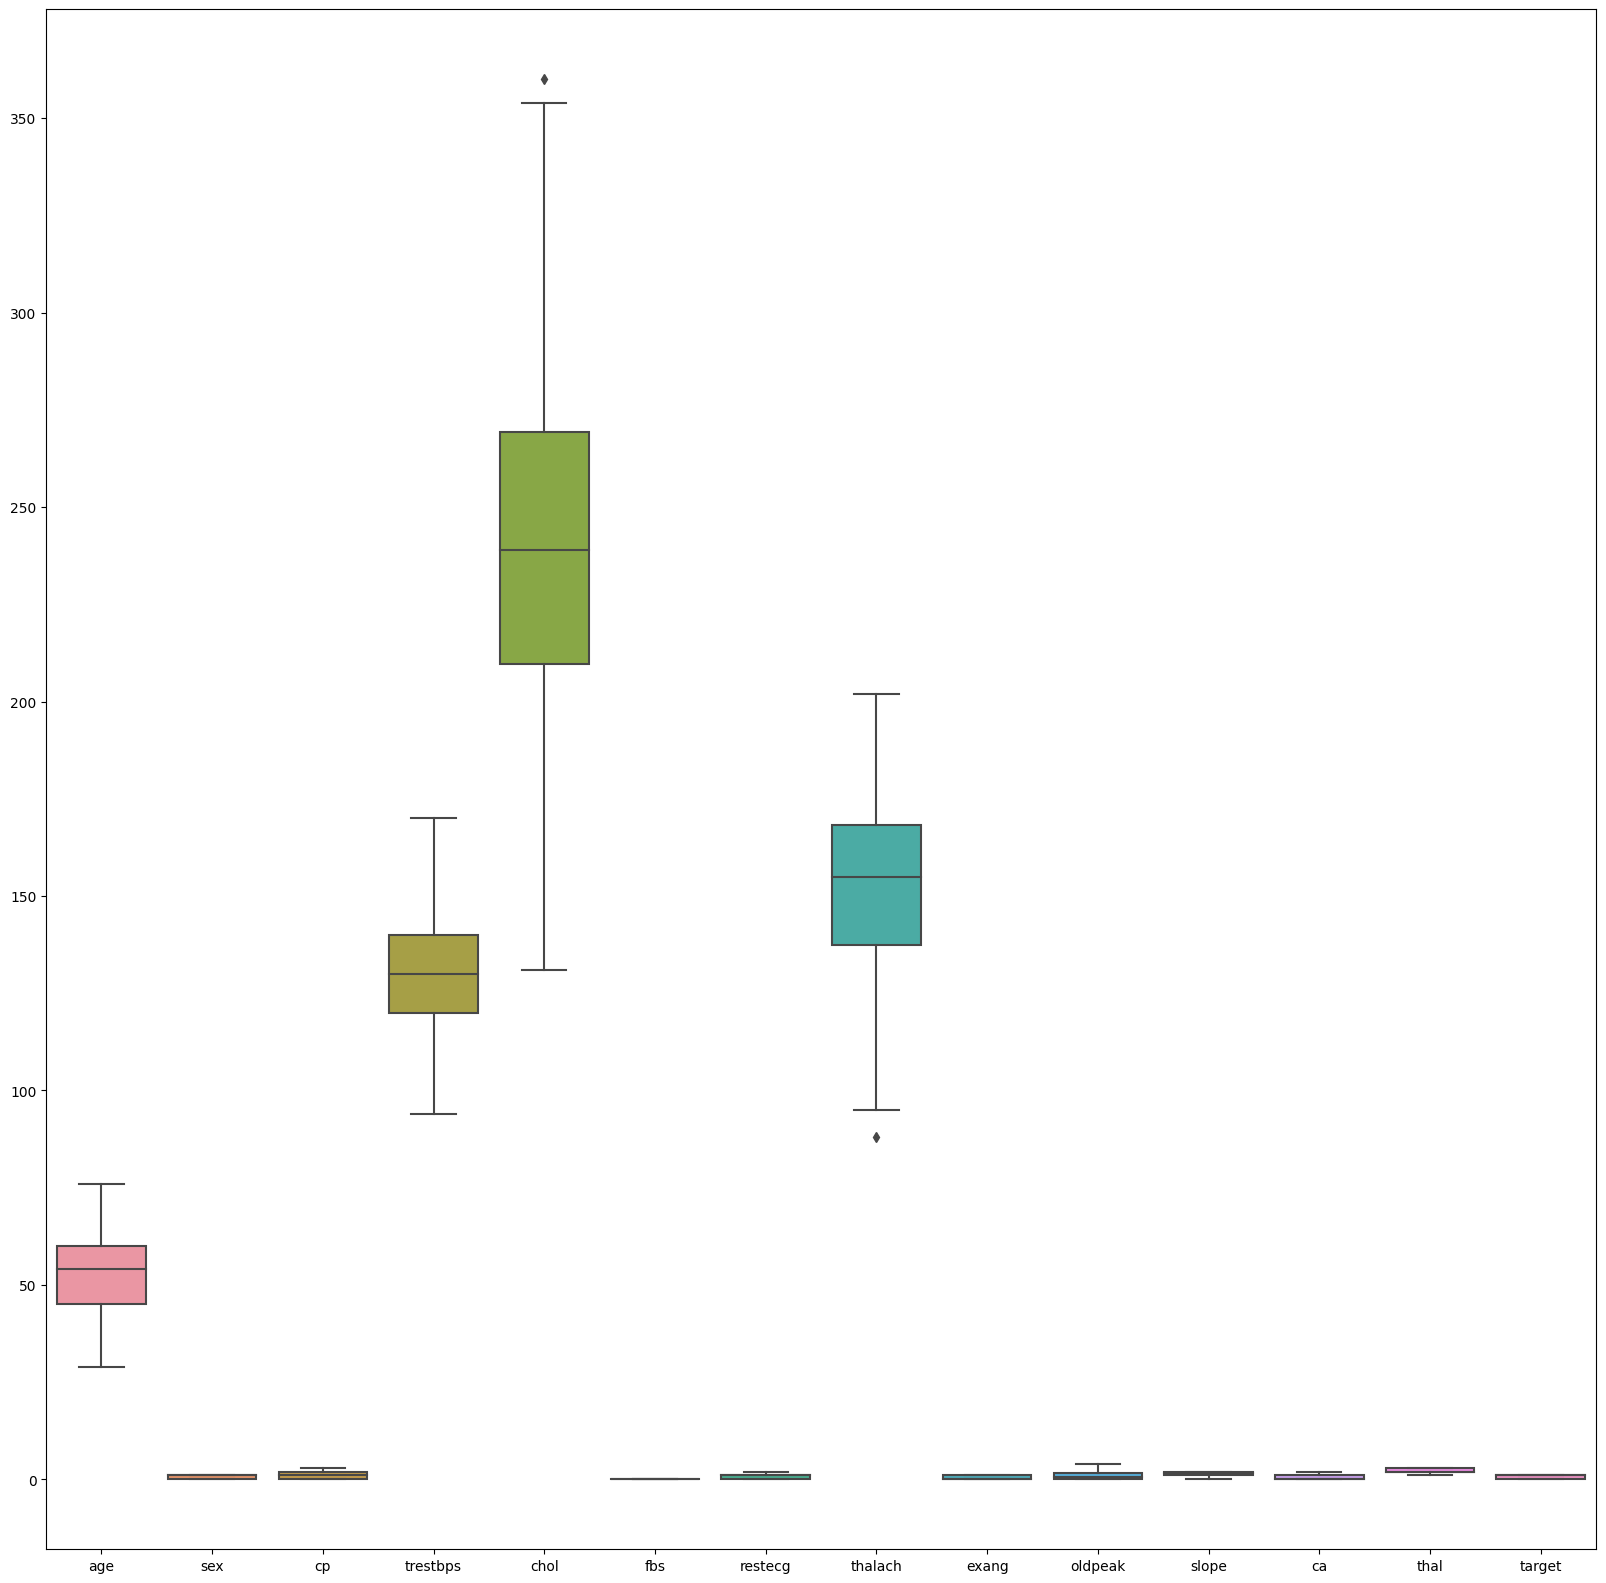

In [11]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

<Axes: >

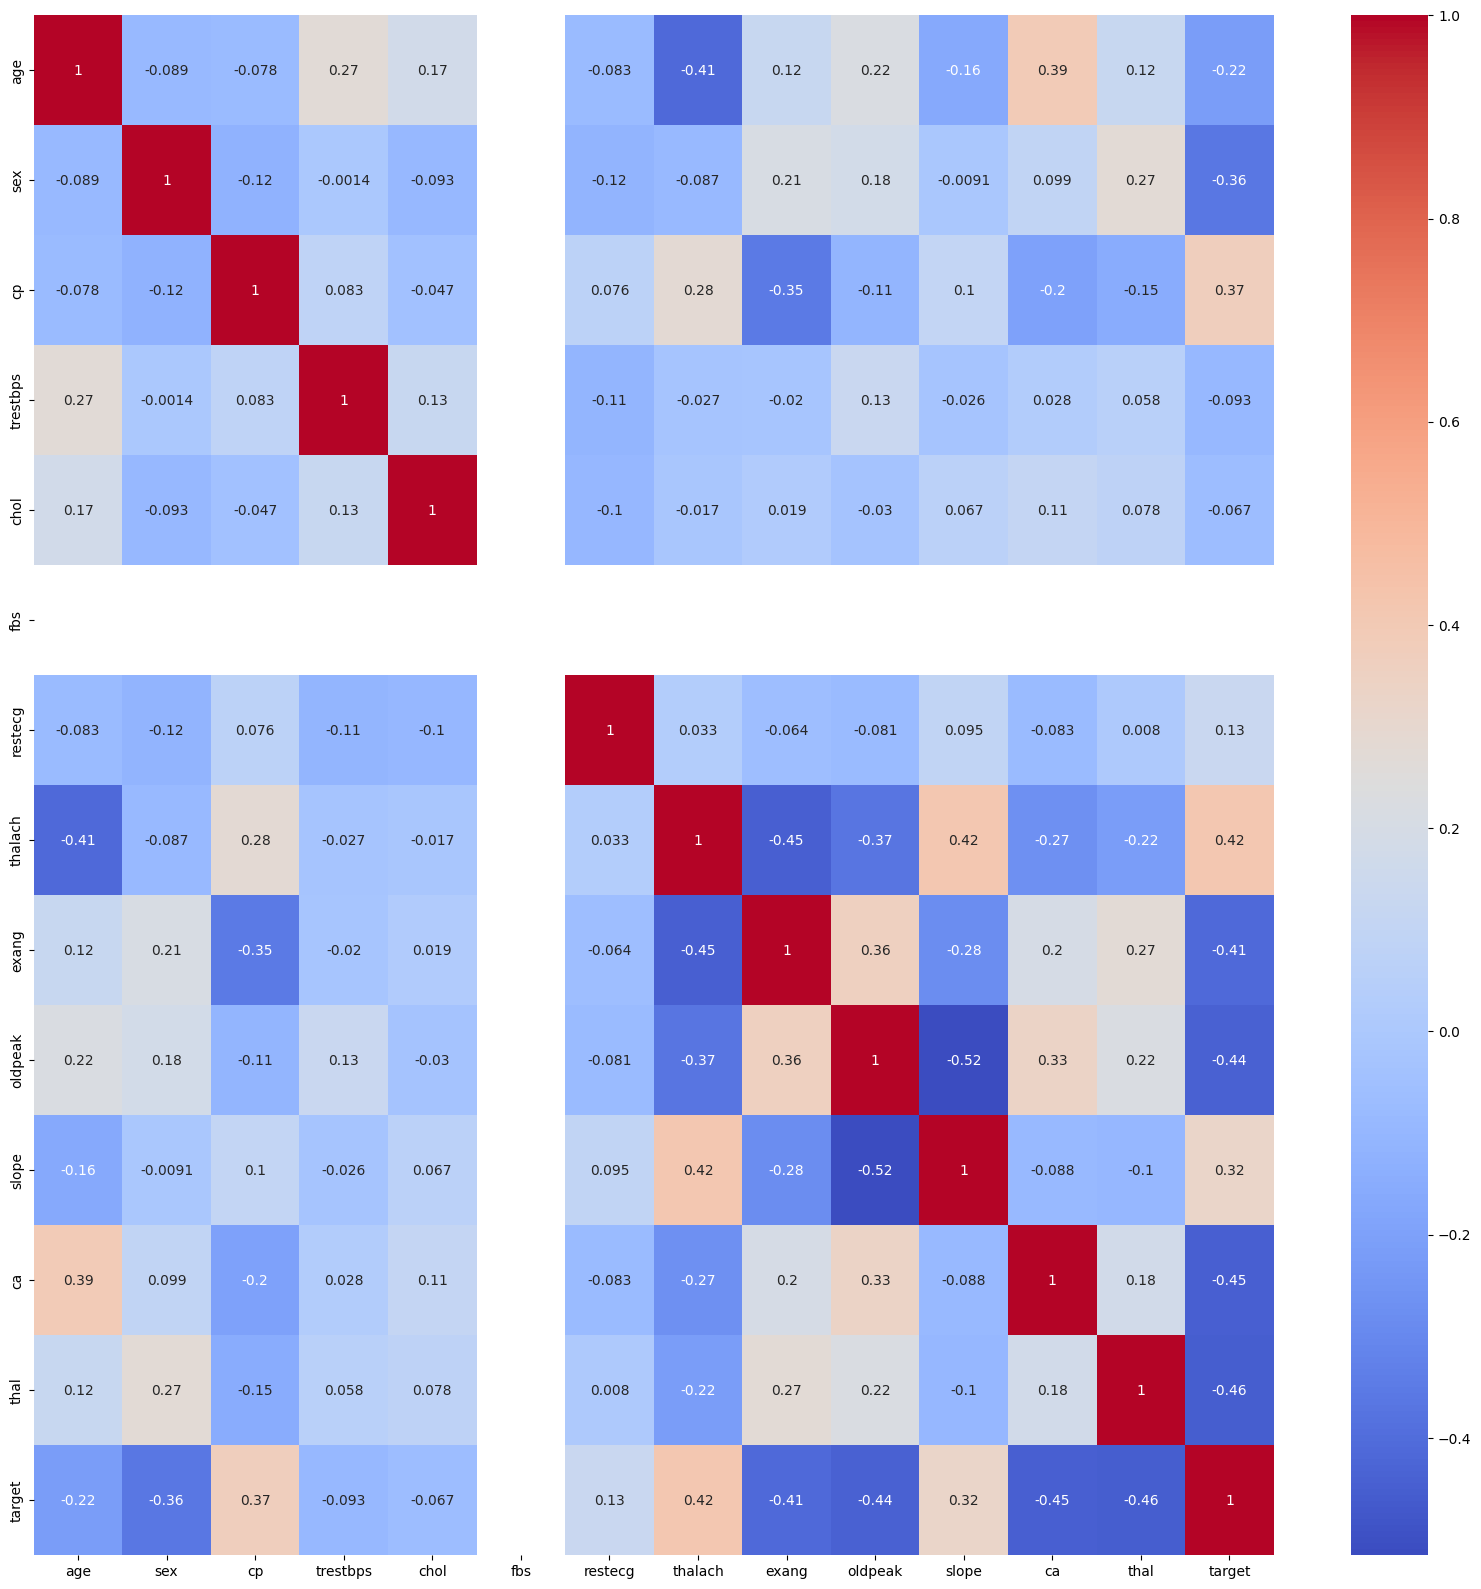

In [12]:
#Feature Selection
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

In [13]:
df=df.drop(columns='chol')
df.head(2)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1


In [14]:
df.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    int64  
 1   sex       228 non-null    int64  
 2   cp        228 non-null    int64  
 3   trestbps  228 non-null    int64  
 4   fbs       228 non-null    int64  
 5   restecg   228 non-null    int64  
 6   thalach   228 non-null    int64  
 7   exang     228 non-null    int64  
 8   oldpeak   228 non-null    float64
 9   slope     228 non-null    int64  
 10  ca        228 non-null    int64  
 11  thal      228 non-null    int64  
 12  target    228 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 24.9 KB


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1 = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])# creating dummy variable
columns_to_scale = ['age', 'trestbps', 'thalach', 'oldpeak'] # we have taken these columns for scale down
df1[columns_to_scale] = sc.fit_transform(df1[columns_to_scale])

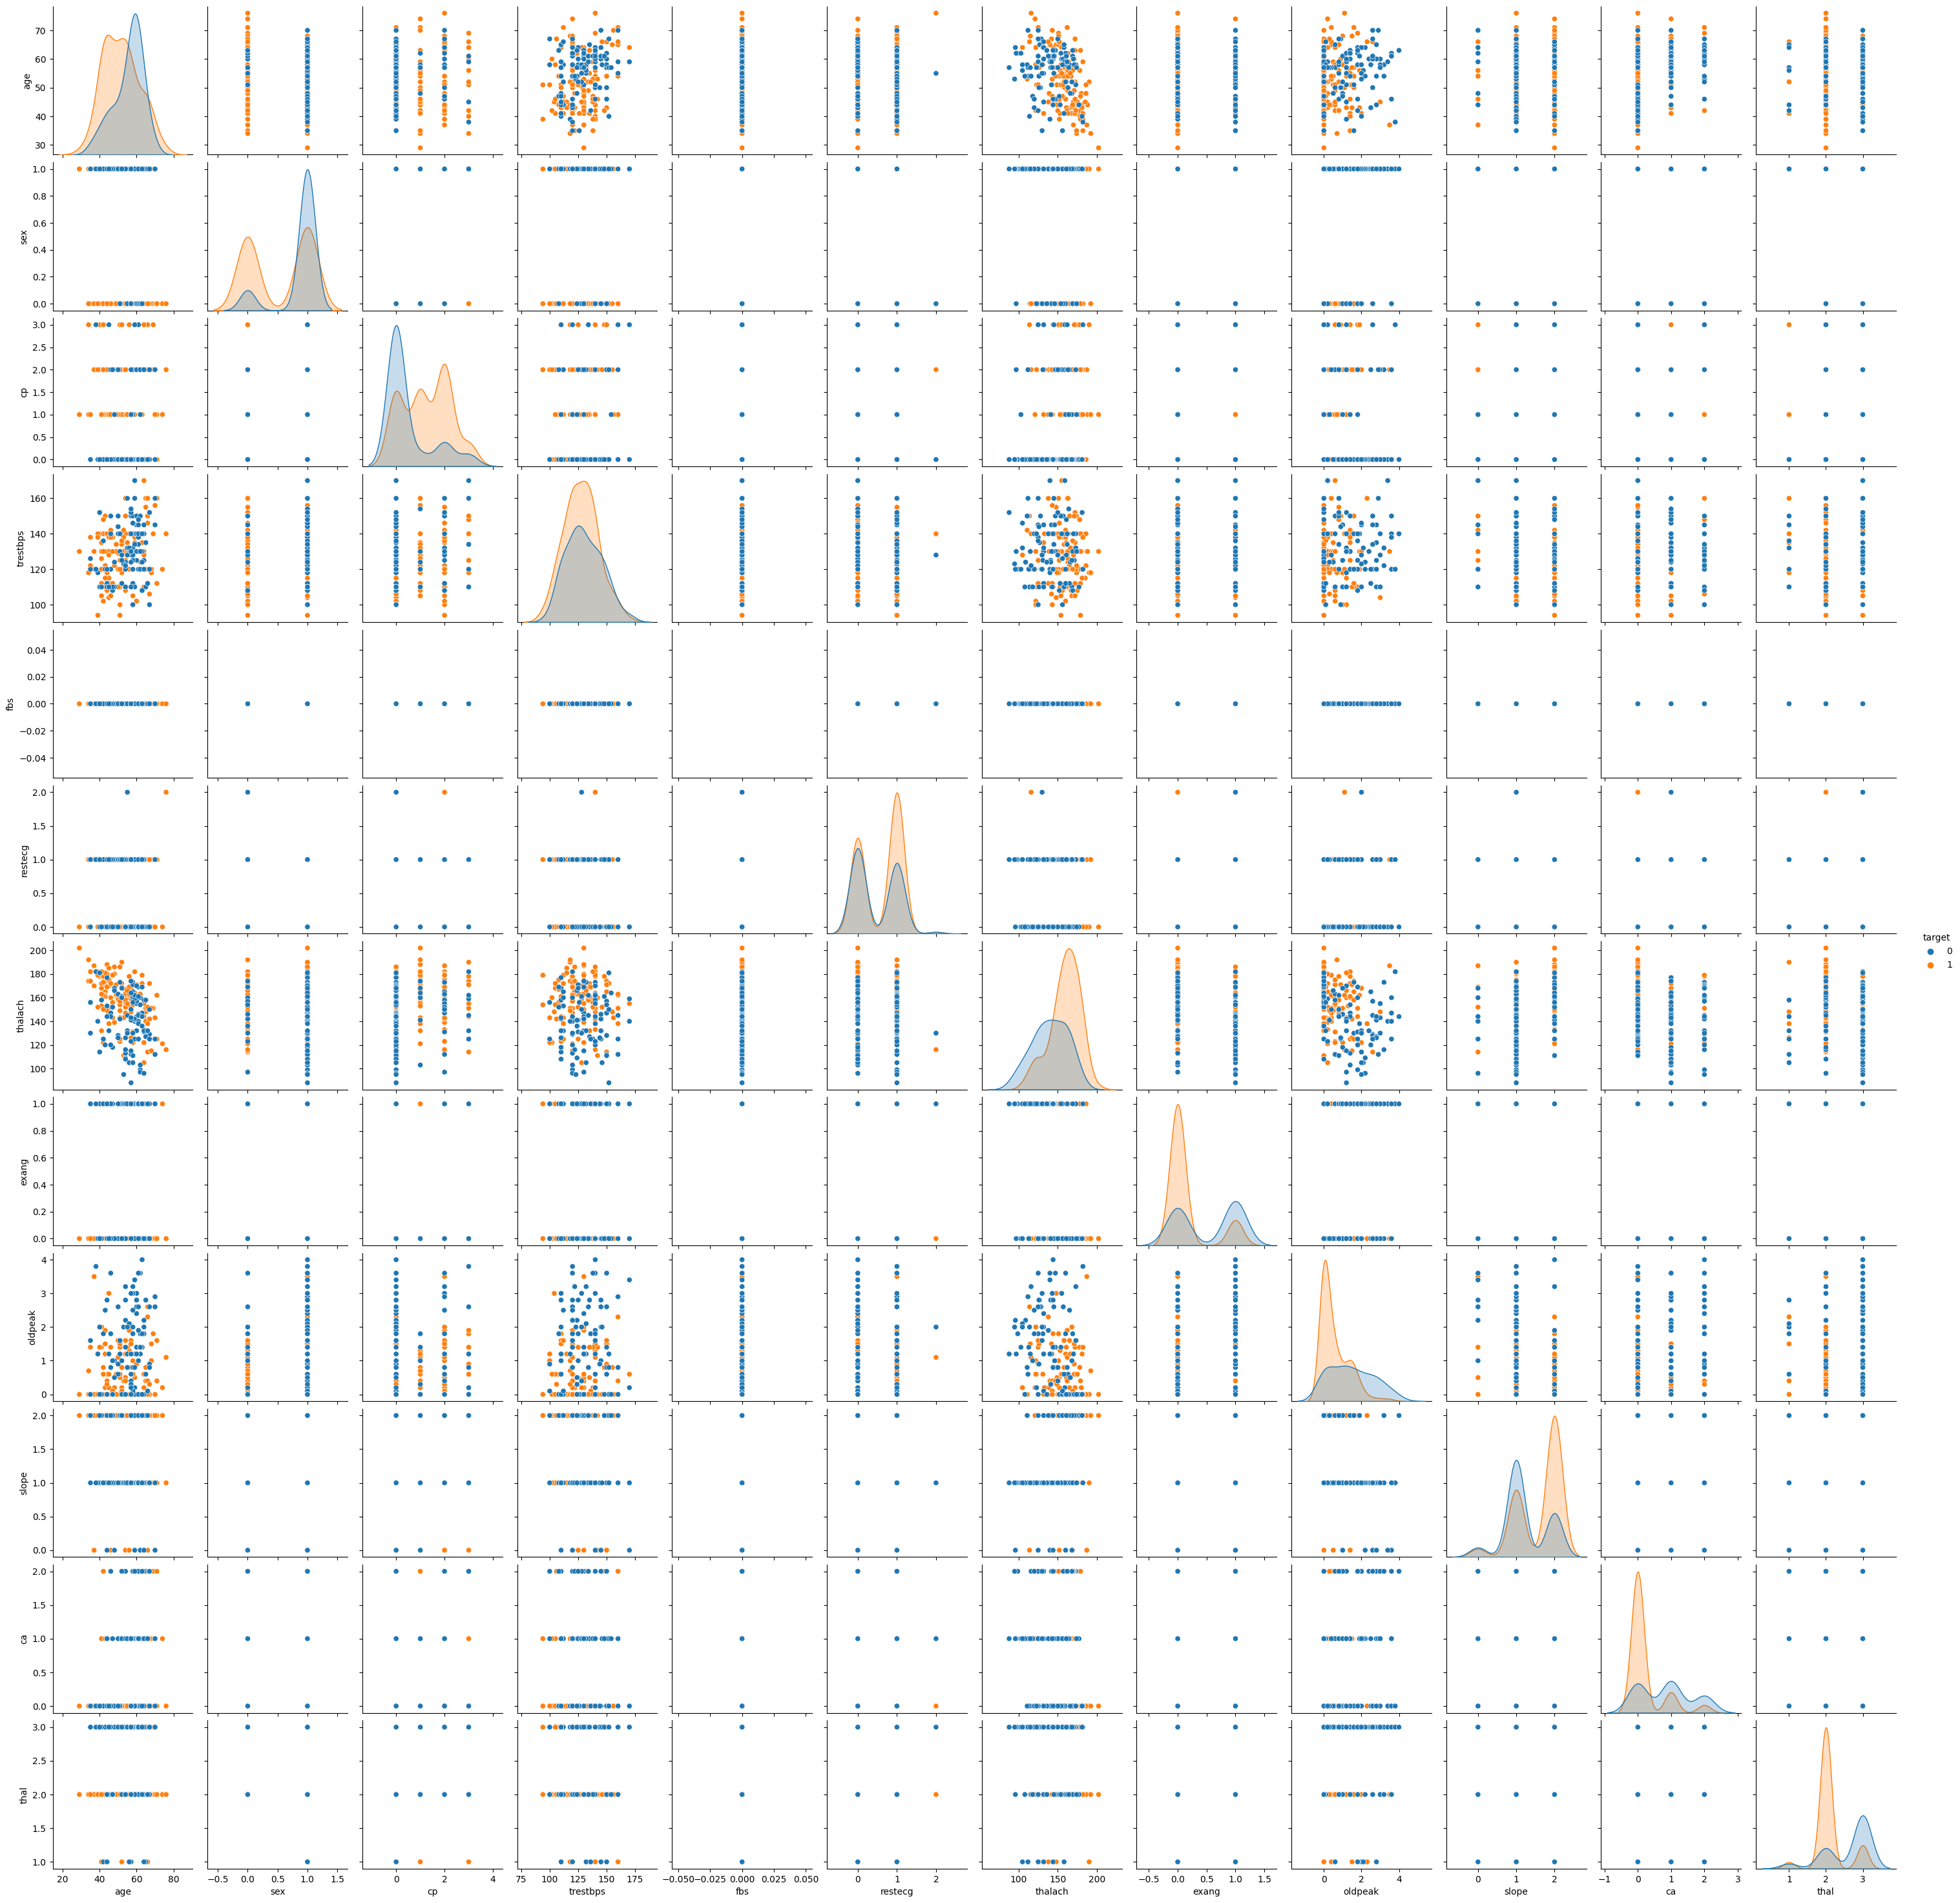

In [18]:
#Visualization
sns.pairplot(df, hue='target')

Model Selection

In [19]:
#Model Selection
y=df['target']
x=df.drop(columns=['target'],axis=1)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
#K-NearestNeighbors
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7608695652173914

In [48]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
accuracy_score(y_test,y_pred_rfc)

0.9347826086956522

In [36]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8478260869565217

In [37]:
#XGBOOST
import xgboost as xgb
xgb_classifier= xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred=xgb_classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.9130434782608695

**As Random Forest is giving high accuracy then he should be our proposed model**

In [44]:
#Cross validation
score=cross_val_score(rfc,X_train,y_train,cv=10)
score.mean()

0.7853801169590644

<Axes: >

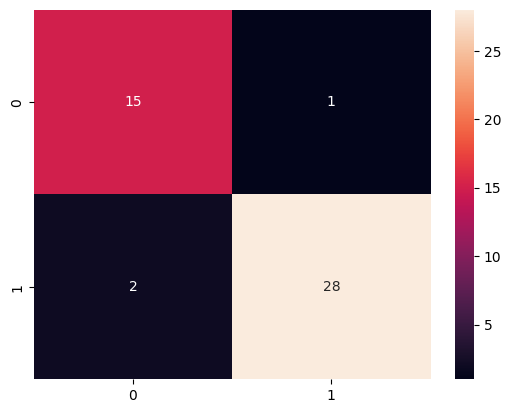

In [49]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True)

In [50]:
#Classification Report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.97      0.93      0.95        30

    accuracy                           0.93        46
   macro avg       0.92      0.94      0.93        46
weighted avg       0.94      0.93      0.94        46

